<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/HD_HW_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модели - ССР сердечно-сосудистый риск


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def classification_metrics(y, pred):
    pre = accuracy_score(y, pred)
    print(f"accuracy score:\t\t{pre:.5f}\n")

    pre = f1_score(y, pred, average="macro")
    print(f"f1 score:\t\t{pre:.5f}")

    pre = precision_score(y, pred, average="macro")
    print(f"precision score:\t{pre:.5f}")

    pre = recall_score(y, pred, average="macro")
    print(f"recall score:\t\t{pre:.5f}")

## Группы 1-3

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.860000,1.996300,71.733333,5.106667,9.693333,29.784000,42.954667,61.626667,103.053333,9.738000,...,1.426667,17.466667,6.838760,6.259333,5.720000,0.406667,55.473333,1.953333,1.460000,2.260000
std,0.733018,5.195903,8.920730,3.421501,5.922255,16.017839,22.785518,32.774713,54.283470,5.531674,...,1.217031,28.401405,5.101542,1.283980,9.826085,0.492857,10.116567,1.160518,0.909532,1.276688
min,1.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,66.000000,5.000000,9.000000,34.025000,49.000000,68.250000,112.500000,11.500000,...,0.000000,-1.000000,2.350000,5.200000,-1.000000,0.000000,48.000000,1.000000,1.000000,2.000000
50%,2.000000,-1.000000,69.000000,6.000000,11.000000,36.900000,52.550000,74.000000,124.000000,12.600000,...,2.000000,-1.000000,6.050000,6.250000,-1.000000,0.000000,55.000000,2.000000,2.000000,3.000000
75%,2.000000,2.001000,78.000000,7.000000,13.750000,38.600000,56.800000,79.000000,136.000000,12.900000,...,3.000000,33.000000,9.483500,7.400000,14.000000,1.000000,62.000000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
# data_1_3_train.isna()
data_1_3_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
14,4.759,85,5,14,34.0,49.0,68,112,12.0,13.0,...,45.417376,1965,342,0.174046,-1,4.759,5.4,-1,0,62
92,-1.000,69,8,10,34.3,54.4,74,128,12.8,13.6,...,39.144204,3098,983,0.317301,-1,10.800,7.3,-1,0,61
102,-1.000,70,9,15,34.4,58.4,75,129,13.3,14.6,...,84.284956,4100,755,0.184146,-1,5.400,8.3,-1,0,41


In [ ]:
data_1_3_y = np.asarray(data_1_3[['ССР']]).ravel()
data_1_3_y[:5]

array([2, 3, 3, 3, 3])

In [ ]:
scaler_1_3_train = StandardScaler()
data_1_3_scaled = pd.DataFrame(scaler_1_3_train.fit_transform(data_1_3_train))
data_1_3_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.351671,-0.419903,1.434963,1.407318,0.996971,0.552428,0.715541,0.608971,0.609809,0.663086,...,0.261925,-0.266982,-0.556578,-0.691562,2.456437,0.424277,-0.124509,0.437035,-0.827885,-1.336271
1,-0.135038,2.166999,-0.031280,0.390796,0.545966,0.310238,0.317564,0.313234,0.374011,0.452908,...,-0.344824,0.089333,-0.371665,-0.679222,-0.652381,-1.089930,-0.358940,-0.686185,-0.827885,1.639097
2,-0.578598,-0.307429,-0.031280,0.051956,0.326728,0.354273,0.562473,0.350201,0.555394,0.840930,...,-0.265878,0.985017,1.327387,1.050010,-0.652381,0.189053,-0.749659,-0.686185,-0.827885,-0.344481
3,-0.578598,-0.982273,-0.031280,0.729637,0.884220,0.631690,0.776768,0.479586,0.718638,0.743924,...,0.391570,-0.180840,0.035678,0.527763,2.138490,0.562737,0.266210,1.151811,-0.827885,0.448950
4,4.442109,-0.757325,0.555217,0.899057,0.940595,0.609673,0.776768,0.479586,0.664224,0.711589,...,0.284698,-0.688884,-0.513700,0.074119,1.467268,3.571877,0.109922,1.764476,-0.827885,0.944844


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7667 [0.73333333 0.86666667 0.73333333 0.73333333 0.76666667]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7400 [0.7        0.73333333 0.73333333 0.76666667 0.76666667]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6800 [0.6        0.83333333 0.6        0.66666667 0.7       ]
n 3: 0.7067 [0.76666667 0.63333333 0.63333333 0.66666667 0.83333333]
n 4: 0.7067 [0.76666667 0.6        0.7        0.73333333 0.73333333]
n 5: 0.7200 [0.8        0.63333333 0.66666667 0.8        0.7       ]
n 6: 0.6933 [0.73333333 0.63333333 0.6        0.76666667 0.73333333]
n 7: 0.7267 [0.76666667 0.7        0.66666667 0.8        0.7       ]
n 8: 0.7133 [0.73333333 0.63333333 0.56666667 0.8        0.83333333]
n 9: 0.7400 [0.76666667 0.7        0.73333333 0.76666667 0.73333333]
n 10: 0.7467 [0.8        0.66666667 0.73333333 0.76666667 0.76666667]
n 11: 0.7467 [0.76666667 0.7        0.73333333 0.76666667 0.76666667]
n 12: 0.7067 [0.76666667 0.63333333 0.63333333 0.73333333 0.76666667]
n 13: 0.7400 [0.76666667 0.73333333 0.66666667 0.76666667 0.76666667]
n 14: 0.7200 [0.76666667 0.7        0.66666667 0.73333333 0.73333333]
n 15: 0.7400 [0.76666667 0.66666667 0.73333333 0.76666667 0.76666667]
n 16: 0.7067 [0.73333333 0.6

In [ ]:
n = 10
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 10: 0.7467 [0.8        0.66666667 0.73333333 0.76666667 0.76666667]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.8267 [0.86666667 0.9        0.7        0.83333333 0.83333333]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8267 [0.8        0.76666667 0.86666667 0.86666667 0.83333333]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))    # max_depth=7,
gb_rmses = cross_val_score(gb_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.9000 [0.9        0.96666667 0.86666667 0.86666667 0.9       ]


In [ ]:
y_train_pred = cross_val_predict(gb_classifier, data_1_3_scaled, data_1_3_y, cv=5)

In [ ]:
classification_metrics(data_1_3_y, y_train_pred)

accuracy score:		0.90000

f1 score:		0.71709
precision score:	0.71308
recall score:		0.72477


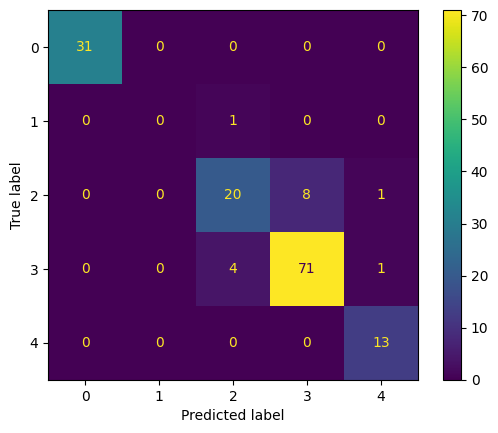

In [ ]:
ConfusionMatrixDisplay.from_predictions(data_1_3_y, y_train_pred)
plt.show()